In [78]:
# Exploratory Data Analysis

In [134]:
### Exploratory Data Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [135]:
#read the data file
df=pd.read_csv("yellow_tripdata_2020-01.csv")
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1       1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2       1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3       1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4       2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            1.2         1.0                  N           238           239   
1            1.2         1.0                  N           239           238   
2            0.6         1.0                  N           238           238   
3            0.8         1.0                  N           238           151   
4            0.0         1.0                  N           193           193   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [136]:
#modify the data type from object to datetime using pandas
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

#getting duration of trip from pickup to drop
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

#convert the time into seconds by dt.total_seconds and then seconds are converted into minutes
#data type is changed from timedelta to float
df['duration']=df['duration'].dt.total_seconds()/60
print(df)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1             1.0  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2             1.0  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3             1.0  2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4             2.0  2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   
...           ...                  ...                   ...              ...   
6405003       NaN  2020-01-31 22:51:00   2020-01-31 23:22:00              NaN   
6405004       NaN  2020-01-31 22:10:00   2020-01-31 23:26:00              NaN   
6405005       NaN  2020-01-31 22:50:07   2020-01-31 23:17:57              NaN   
6405006       NaN  2020-01-31 22:25:53   2020-01-31 22:48:32              NaN   
6405007       NaN  2020-01-31 22:44:00   2020-01-31 23:06:00              NaN   

         trip_distance  Rat

In [137]:
#selecting required columns as per problem statement from the whole dataset
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]
print(df.head())

   passenger_count  payment_type  fare_amount  trip_distance  duration
0              1.0           1.0          6.0            1.2  4.800000
1              1.0           1.0          7.0            1.2  7.416667
2              1.0           1.0          6.0            0.6  6.183333
3              1.0           1.0          5.5            0.8  4.850000
4              1.0           2.0          3.5            0.0  2.300000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   payment_type     float64
 2   fare_amount      float64
 3   trip_distance    float64
 4   duration         float64
dtypes: float64(5)
memory usage: 244.3 MB


In [139]:
#chekcing the count of null values
df.isnull().sum() #dataframe contains 65441 null values

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [140]:
#percentage of null values from data set
(65441/len(df))*100

1.021716132126611

In [141]:
#since there is only 1% of null values in whole data set we delete the rows of null values
df.dropna(inplace=True)
df.isnull().sum() #dataframe contains 65441 null values
#after deletion of null values the data has 6339567 rows
df.shape 

(6339567, 5)

In [142]:
#converting the data types of passenger_count & payment_type to int64 from float64
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [143]:
#checking  and removing duplicate values
df.duplicated().sum() #data frame contains 3331706 duplicate values
#removing duplicate values
df.drop_duplicates(inplace=True)
df.shape #after removing duplicates data frame has 3007861 rows

(3007861, 5)

In [144]:
### these are categorical data
#since we need to perform analysis on 1='card' and 2='cash' we delete data of payment done through other modes
df=df[df['payment_type']<3]
#since the passenger in the  taxi ride would not be more than 5 we delete passengers more than 5
df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,1,10.0,2.09,14.800000
6339561,1,1,17.5,4.11,21.500000
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333


In [145]:
#rename 1 & 2 with 'Card'  & 'Cash"
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [146]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [147]:
# these are numerical data
#as we see the means of fare_amnt & trip_distance & duration have -ve values we remove rows having -ve values from data
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]
df=df[df['duration']>0]

In [148]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.748932e+06,2.748932e+06,2.748932e+06,2.748932e+06
mean,1.738151e+00,1.766835e+01,4.583313e+00,2.418261e+01
std,1.179440e+00,1.447531e+01,4.897806e+00,9.272285e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.530000e+00,9.950000e+00
50%,1.000000e+00,1.300000e+01,2.770000e+00,1.575000e+01
75%,2.000000e+00,2.100000e+01,5.500000e+00,2.333333e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


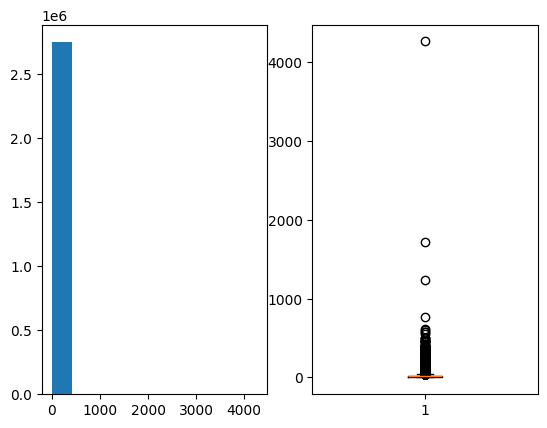

In [149]:
#we check outliers visually usin histogram and box plot
plt.subplot(1,2,1)
plt.hist(df['fare_amount'])
plt.subplot(1,2,2)
plt.boxplot(df['fare_amount'])
plt.show()

In [150]:
#as we observe the outliers effecting the result we remove them

# we can remove outliers through z-score (if data is normally distributed) and through Intequantile range(IQR)
#since data is not normally distributed we use IQR
for col in ['fare_amount','trip_distance','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1-1.5 * IQR
    upper_bound = q3+1.5 * IQR
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
print(df)

         passenger_count payment_type  fare_amount  trip_distance   duration
0                      1         Card          6.0           1.20   4.800000
1                      1         Card          7.0           1.20   7.416667
2                      1         Card          6.0           0.60   6.183333
3                      1         Card          5.5           0.80   4.850000
5                      1         Cash          2.5           0.03   0.883333
...                  ...          ...          ...            ...        ...
6339550                4         Card         10.5           2.40  12.383333
6339555                3         Card         10.0           2.09  14.800000
6339561                1         Card         17.5           4.11  21.500000
6339563                1         Card         13.0           2.13  19.000000
6339564                1         Card         12.5           2.55  16.283333

[2297908 rows x 5 columns]


In [151]:
# Data Visualization

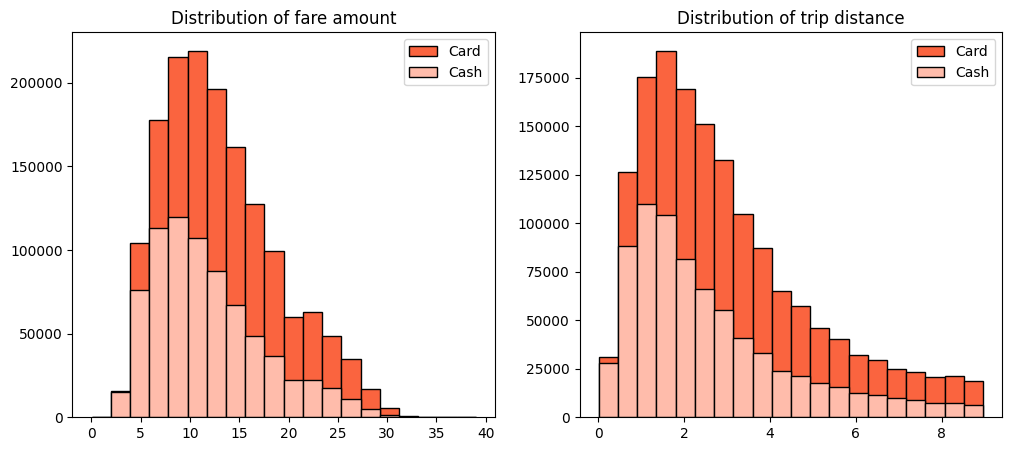

In [152]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#FFBCAB',label='Cash')
plt.legend()
plt.show()

In [153]:
#to calculate aggregate functions such as mean, standard deviation etc. we use groupby and agg functions
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})
#we observe that the mean and stand.dev of card is more for both fare amnt and tripdistance which shows payment through card is more

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Card           13.112493  5.849281      2.992237  1.99274
Cash           11.758005  5.613038      2.602207  1.91372

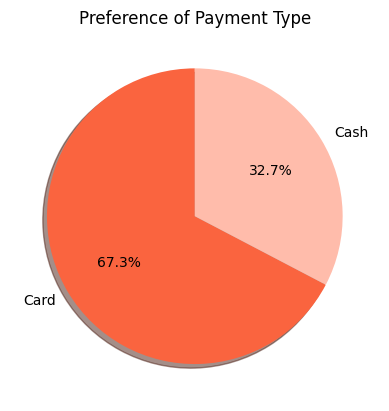

In [154]:
#to visually represent the total percentage of card and cash we use pie chart
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,startangle=90,autopct='%1.1f%%',
        colors=['#FA643F','#FFBCAB'],shadow=True)
plt.show()

In [155]:
#now we visualize payment type with respective of passenger count
#for that we group payment type and passenger count
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Card         1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626

In [156]:
#we create another data frame of passenger_count and store the above table
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

#renaming the column
passenger_count.rename(columns={'passenger_count':'count'},inplace = True)

passenger_count.reset_index(inplace=True)

#we add percentage column in the data frame
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,909245,39.568381
1,Card,2,327661,14.259100
2,Card,3,122412,5.327106
3,Card,4,63676,2.771042
4,Card,5,124045,5.398171
5,Cash,1,460550,20.042143
6,Cash,2,155472,6.765806
7,Cash,3,54506,2.371984
8,Cash,4,32715,1.423686
9,Cash,5,47626,2.072581


In [157]:
#we create a custom data frame to trandsform the existing data frame values
#we ceate a new data frame because to create a stacked bar chart
#we if we use direct bar chart we get normal bar chart
d=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
# payment_type is seeting with card and cash values
d['payment_type']=['Card','Cash']
d.iloc[0,1:]=passenger_count.iloc[0:5,-1]
d.iloc[1,1:]=passenger_count.iloc[5:,-1] # (or) df.iloc[1,1:]=passenger_count.iloc[5:len(passenger_count),-1]
d

,payment_type,1,2,3,4,5
0,Card,39.568381,14.2591,5.327106,2.771042,5.398171
1,Cash,20.042143,6.765806,2.371984,1.423686,2.072581


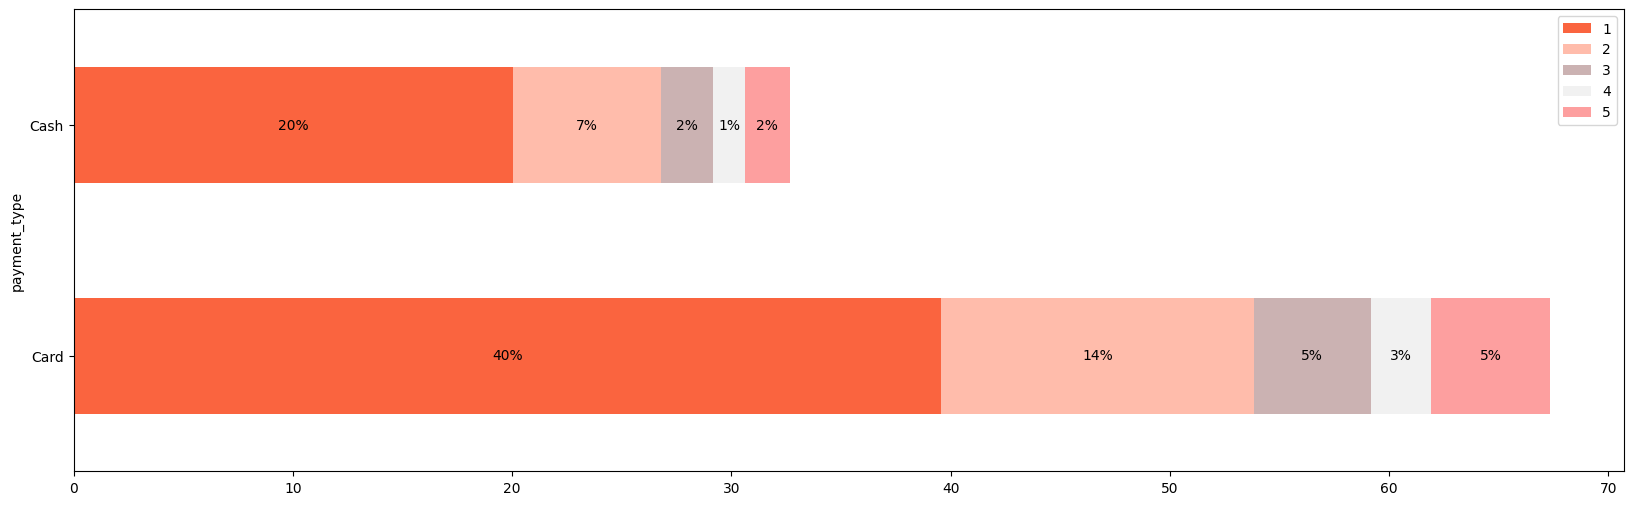

In [158]:
# We create stack bar chart
fig,ax= plt.subplots(figsize=(20,6))
#ax is plot inside plot use dto size the stacked bars
d.plot(x='payment_type',kind='barh',stacked=True,ax = ax,color=['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#FD9F9F'])

#labelling percentages in bars
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.0f}%'.format(width),horizontalalignment='center',verticalalignment='center')

In [159]:
# Hypothesis Testing
# Null Hypothesis: there is no diff in average fare b/w customers who use credit cards & customers who use cash
# Alternate Hypothesis : there is diff in average fare b/w customers who use credit cards & customers who use cash

In [160]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,Card,6.0,1.20,4.800000
1,1,Card,7.0,1.20,7.416667
2,1,Card,6.0,0.60,6.183333
3,1,Card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Card,10.5,2.40,12.383333
6339555,3,Card,10.0,2.09,14.800000
6339561,1,Card,17.5,4.11,21.500000
6339563,1,Card,13.0,2.13,19.000000


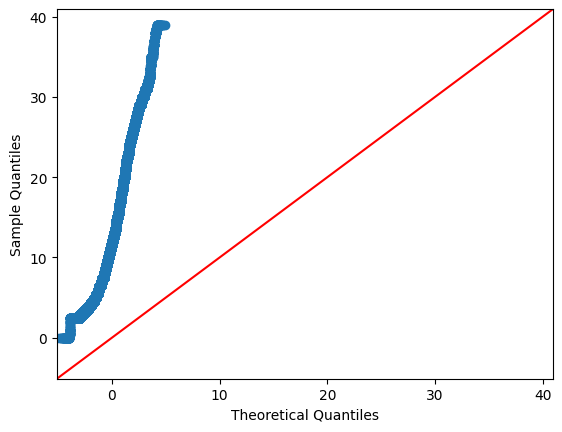

In [161]:
#to check wether the data is normally distributed or not we use qqplot from statsmodel.api package
df
sm.qqplot(df['fare_amount'],line='45')
plt.show()

In [162]:
#since data is not normally distributed , sigma is unknown and fare amount is continous we neglect chi-square and z-test and we perform t-test
#we take two samples from data frame
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

#ttest_ind from scipy package is used calculate t_stat and p_values
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print("T-Test is : ",t_stats,"P-value is : ",p_value)

T-Test is :  169.2111527245052 P-value is :  0.0
